<a href="https://colab.research.google.com/github/aylarba/Evaluation_metabolomics/blob/main/Copy_of_PubMed_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PubMed Visualization
This notebook will help you to visualize the sample output of searches trough the PubMed database.  
  
## Data format
To prepare the data:  
1. place all the data files in a directory with the following name foramt:  **GROUPNAME(underline)SUBGROUPNAME.csv**. As an example: Adiposity_GC-MS.csv shows the results from *Adiposity* with GC-MS as the thechnology.
2. replace the directory name with the _dat_directory_ argument in the **data_prep** function (It's default value is _pubmed_data_)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import datetime

In [ ]:
import os

In [ ]:
def data_prep(dat_directory  = 'path-to-data/'):
    cn = 0
    for file in os.listdir(dat_directory + '/'):
        file_path = str(dat_directory + '/' + file)
        temp = pd.read_csv(file_path, skiprows=1, sep=',')
        temp.columns = ['year', 'count']
        temp.loc[:, 'omics'] = file.split('_')[0].split('.')[0]
        temp.loc[:, 'tech'] = file.split('_')[-1].split('.')[0]
        if cn == 0:
          df = temp.copy()
        else:
          df = pd.concat([df, temp], ignore_index=True)
        cn += 1
    return df


In [ ]:
def ncolors(n, colormap='cividis', custom_palette=None):
    """
    Utility for defining N evenly spaced colors across a color map or custom palette.
    :param n: number of colors to generate
    :param colormap: name of colormap to use (default: 'cividis')
    :param custom_palette: custom list of colors to use (default: None)
    :return: list of N colors
    """
    if custom_palette is not None:
        return custom_palette[:n]
    else:
        cmap = plt.get_cmap(colormap)
        cmap_max = cmap.N
        return [cmap(int(k * cmap_max / (n - 1))) for k in range(n)]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Define the data preparation function to load the TSV file directly
def data_prep(file_path):
    return pd.read_csv(file_path, sep='\t', skiprows=1)  # Adjust separator if necessary

# Set the file path to the TSV file
file_path = '/content/drive/MyDrive/Project/data/pubmed_data.tsv'

# Load the data using the correct parameter
df_main = data_prep(file_path=file_path)

# Process the dataframe
name_list = list(set(df_main['omics']))
name_list.sort()
min_year = df_main['year'].min()
max_year = df_main['year'].max()
temp_0 = pd.DataFrame(range(min_year, max_year + 1), columns=['year'])
tech_list = list(df_main['tech'])
tech_list.sort()

# Generate a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(tech_list)))  # Using Matplotlib to create colors
color_pal = dict(zip(tech_list, colors))

# Create plot
fig = plt.figure(figsize=(7.2, 1.6))
gs = GridSpec(4, 6, wspace=0.0, hspace=0.0)
px = []
cn = 0

for i in [0, 2]:
    for j in [0, 2, 4]:
        temp = df_main[df_main['main_term'] == name_list[cn]]
        temp = pd.pivot_table(data=temp, index=['year'], columns=['tech'], values='count').reset_index()
        df = temp_0.merge(temp, how='left')
        df.fillna(0, inplace=True)

        ax = fig.add_subplot(gs[i:(i + 2), j:(j + 2)])
        df.plot(x='year', kind='bar', stacked=True, color=[color_pal[tech] for tech in df.columns[1:]], ax=ax)
        ax.set_xlabel("")
        ax.set_yticks(np.round(np.linspace(*ax.get_ylim(), 5), 0))
        ax.legend(loc='upper left', fontsize=5)
        ax.text(.5, .85, name_list[cn], transform=ax.transAxes, ha="center", weight='bold', size=7)
        px.append(ax)
        cn += 1

fig.text(0.5, -0.03, 'Year', ha='center', fontsize=7, weight='bold')
fig.text(-0.01, 0.6, '# of publications', va='center', rotation='vertical', fontsize=7, weight='bold')
plt.tight_layout(pad=0.05)

# Save the figure
output_path = '/content/drive/MyDrive/Project/data'  # Adjust as necessary, assuming it's a directory
fig.savefig(output_path + "/supp1.pdf", dpi=600, bbox_inches="tight")
fig.savefig(output_path + "/supp1.png", dpi=600, bbox_inches="tight")
plt.show()


KeyError: 'omics'

In [ ]:
# Load the data using the correct parameter
df_main = data_prep(file_path=file_path)

# Print column names to check what's available
print(df_main.columns)



TypeError: data_prep() got an unexpected keyword argument 'file_path'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Define the data preparation function to load the TSV file directly
def data_prep(file_path):  # Corrected the parameter name to file_path
    return pd.read_csv(file_path, sep='\t', skiprows=1)  # Adjust separator if necessary

# Set the file path to the TSV file
file_path = '/content/drive/MyDrive/Project/data/pubmed_data.tsv'

# Load the data using the corrected function call
df_main = data_prep(file_path=file_path)  # Correctly passing file_path as the argument

# Print column names to check what's available
print(df_main.columns)

# Adjust the rest of the script based on the actual column names
name_list = list(set(df_main['Correct_Column_Name_for_Omics']))  # Replace 'Correct_Column_Name_for_Omics' with the actual column name
name_list.sort()
min_year = df_main['year'].min()  # Confirm the correct column name for 'year'
max_year = df_main['year'].max()
temp_0 = pd.DataFrame(range(min_year, max_year + 1), columns=['year'])
tech_list = list(df_main['Correct_Column_Name_for_Tech'])  # Replace 'Correct_Column_Name_for_Tech' with the actual column name
tech_list.sort()

# Assuming you have a function to generate colors
colors = plt.cm.viridis(np.linspace(0, 1, len(tech_list)))  # Example to create a color palette
color_pal = dict(zip(tech_list, colors))

# Continue plotting logic here (ensure all references use the actual column names)


Index(['2023', '236', 'metabolomics', 'software'], dtype='object')


KeyError: 'Correct_Column_Name_for_Omics'

In [ ]:
def data_prep(file_path):
    # If the file does not contain headers, you can specify them manually:
    headers = ['Year', 'Count', 'Omics', 'Technology']  # Example header names, adjust as needed
    return pd.read_csv(file_path, sep='\t', skiprows=0, names=headers)  # Remove skiprows if headers are in the first row

# Load the data with headers
df_main = data_prep(file_path=file_path)

# Check the corrected headers
print(df_main.columns)


Index(['Year', 'Count', 'Omics', 'Technology'], dtype='object')


In [ ]:
# Assuming column names are now correctly set as 'Year', 'Count', 'Omics', 'Technology'
name_list = list(set(df_main['Omics']))
name_list.sort()
min_year = df_main['Year'].min()
max_year = df_main['Year'].max()
temp_0 = pd.DataFrame(range(min_year, max_year + 1), columns=['Year'])
tech_list = list(df_main['Technology'])
tech_list.sort()

colors = plt.cm.viridis(np.linspace(0, 1, len(tech_list)))
color_pal = dict(zip(tech_list, colors))

# Proceed with plotting logic, ensuring all references use the actual column names


TypeError: can only concatenate str (not "int") to str

In [ ]:
# Convert 'Year' column to integers
df_main['Year'] = df_main['Year'].astype(int)

# Now calculate min and max years
min_year = df_main['Year'].min()
max_year = df_main['Year'].max()

# Create a DataFrame with a range of years
temp_0 = pd.DataFrame(range(min_year, max_year + 1), columns=['Year'])


ValueError: invalid literal for int() with base 10: 'year'

In [ ]:
# Print the first few entries in the 'Year' column
print(df_main['Year'].head())

# Additionally, check for any non-numeric values
print(df_main[df_main['Year'].str.isnumeric() == False])


0    year
1    2023
2    2022
3    2021
4    2020
Name: Year, dtype: object
   Year  Count  Omics Technology
0  year  count  Omics       Tech


In [ ]:
def data_prep(file_path):
    # Load the file, specifying the first row as headers
    return pd.read_csv(file_path, sep='\t', header=0)  # header=0 tells pandas the first line is the header

# Reload the data with corrected settings
df_main = data_prep(file_path=file_path)

# Check the column names to ensure the headers are now correctly used
print(df_main.columns)
print(df_main.head())


Index(['year', 'count', 'Omics', 'Tech'], dtype='object')
   year  count         Omics      Tech
0  2023    236  metabolomics  software
1  2022    268  metabolomics  software
2  2021    262  metabolomics  software
3  2020    282  metabolomics  software
4  2019    237  metabolomics  software


In [ ]:
# Convert 'year' column to integers
df_main['year'] = df_main['year'].astype(int)

# Now calculate min and max years
min_year = df_main['year'].min()
max_year = df_main['year'].max()

# Create a DataFrame with a range of years
temp_0 = pd.DataFrame(range(min_year, max_year + 1), columns=['year'])


IndexError: list index out of range

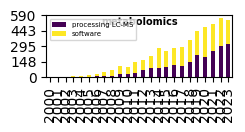

In [ ]:
# Assuming you want to sort and use the 'Omics' and 'Tech' information
name_list = list(set(df_main['Omics']))
name_list.sort()
tech_list = list(set(df_main['Tech']))
tech_list.sort()

# Generate a color palette for the technologies
colors = plt.cm.viridis(np.linspace(0, 1, len(tech_list)))
color_pal = {tech: color for tech, color in zip(tech_list, colors)}

# Example plot setup (adjust according to your needs)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(7.2, 1.6))
gs = GridSpec(4, 6, wspace=0.0, hspace=0.0)
px = []
cn = 0

for i in [0, 2]:
    for j in [0, 2, 4]:
        temp = df_main[df_main['Omics'] == name_list[cn]]
        temp = pd.pivot_table(data=temp, index=['year'], columns=['Tech'], values='count').reset_index()
        df = temp_0.merge(temp, how='left', on='year')
        df.fillna(0, inplace=True)

        ax = fig.add_subplot(gs[i:(i+2), j:(j+2)])
        df.plot(x='year', kind='bar', stacked=True, color=[color_pal[tech] for tech in df.columns[1:]], ax=ax)
        ax.set_xlabel("")
        ax.set_yticks(np.round(np.linspace(*ax.get_ylim(), 5), 0))
        ax.legend(loc='upper left', fontsize=5)
        ax.text(.5, .85, name_list[cn], transform=ax.transAxes, ha="center", weight='bold', size=7)
        px.append(ax)
        cn += 1

fig.text(0.5, -0.03, 'Year', ha='center', fontsize=7, weight='bold')
fig.text(-0.01, 0.6, '# of publications', va='center', rotation='vertical', fontsize=7, weight='bold')
plt.tight_layout(pad=0.05)
plt.show()


In [ ]:
print("Number of elements in name_list:", len(name_list))
print("Number of iterations expected in the loop:", 3 * 3)  # Given your loop setup: 3 rows and 3 columns


Number of elements in name_list: 1
Number of iterations expected in the loop: 9


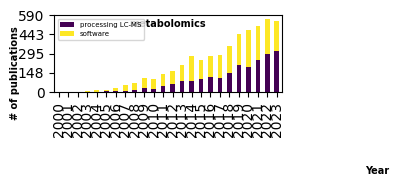

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Assuming that df_main and other required DataFrames are already defined as shown previously
fig = plt.figure(figsize=(7.2, 1.6))
gs = GridSpec(4, 6, wspace=0.0, hspace=0.0)
px = []
cn = 0

# Adjust the loop to prevent 'IndexError'
for i in [0, 2]:
    for j in [0, 2, 4]:
        if cn < len(name_list):  # Check if cn is within the range of name_list
            temp = df_main[df_main['Omics'] == name_list[cn]]
            temp = pd.pivot_table(data=temp, index=['year'], columns=['Tech'], values='count').reset_index()
            df = temp_0.merge(temp, how='left', on='year')
            df.fillna(0, inplace=True)

            ax = fig.add_subplot(gs[i:(i+2), j:(j+2)])
            df.plot(x='year', kind='bar', stacked=True, color=[color_pal[tech] for tech in df.columns[1:]], ax=ax)
            ax.set_xlabel("")
            ax.set_yticks(np.round(np.linspace(*ax.get_ylim(), 5), 0))
            ax.legend(loc='upper left', fontsize=5)
            ax.text(.5, .85, name_list[cn], transform=ax.transAxes, ha="center", weight='bold', size=7)
            px.append(ax)
        cn += 1  # Increment cn here to keep track properly

fig.text(0.5, -0.03, 'Year', ha='center', fontsize=7, weight='bold')
fig.text(-0.01, 0.6, '# of publications', va='center', rotation='vertical', fontsize=7, weight='bold')
plt.tight_layout(pad=0.05)
plt.show()
